# Mapping in Python with `geopandas`

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
from seaborn import palplot

In [5]:
estaciones = gpd.read_file('data/estaciones_de_subte.shp')
estaciones.head()

,ID,ESTACION,LINEA,geometry
0,1.0,CASEROS,H,POINT (105902.3513636972 99279.28209795424)
1,2.0,INCLAN,H,POINT (105715.5543212891 99986.54907226562)
2,3.0,HUMBERTO 1°,H,POINT (105591.8884887695 100683.6583251953)
3,4.0,VENEZUELA,H,POINT (105371.4735107422 101554.6354980469)
4,5.0,ONCE - 30 DE DICIEMBRE,H,POINT (105252.2113037109 102254.3510742188)


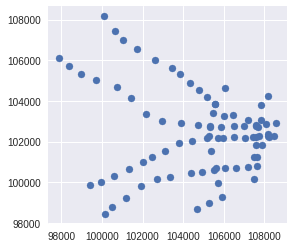

In [6]:
estaciones.plot()

In [7]:
#vamos a crear una funcion para leer nuestros datos de acuerdo a si queremos un sabado o que hora

def leerData(dia,hora):
    db = pd.read_csv('data/trx_por_linea_estacionID.csv')
    db = db.loc[(db.dia_semana == dia) &
                (db.hora == hora),['ID','TOTAL']]
    return db



In [8]:
#corremos la funcion
dt = leerData(dia = 'miercoles', hora = 8)
dt.TOTAL = dt.TOTAL.map(float)
dt.head()

,ID,TOTAL
6439,31,555.0
6440,32,545.0
6441,33,1081.0
6442,34,1464.0
6443,35,2138.0


In [9]:
estaciones.ID =estaciones.ID.map(int)
estaciones.head()

,ID,ESTACION,LINEA,geometry
0,1,CASEROS,H,POINT (105902.3513636972 99279.28209795424)
1,2,INCLAN,H,POINT (105715.5543212891 99986.54907226562)
2,3,HUMBERTO 1°,H,POINT (105591.8884887695 100683.6583251953)
3,4,VENEZUELA,H,POINT (105371.4735107422 101554.6354980469)
4,5,ONCE - 30 DE DICIEMBRE,H,POINT (105252.2113037109 102254.3510742188)


In [10]:
estaciones = estaciones.merge(dt,on='ID',how='left')
estaciones.head()

,ID,ESTACION,LINEA,geometry,TOTAL
0,1,CASEROS,H,POINT (105902.3513636972 99279.28209795424),2233.0
1,2,INCLAN,H,POINT (105715.5543212891 99986.54907226562),2225.0
2,3,HUMBERTO 1°,H,POINT (105591.8884887695 100683.6583251953),2276.0
3,4,VENEZUELA,H,POINT (105371.4735107422 101554.6354980469),2949.0
4,5,ONCE - 30 DE DICIEMBRE,H,POINT (105252.2113037109 102254.3510742188),4139.0


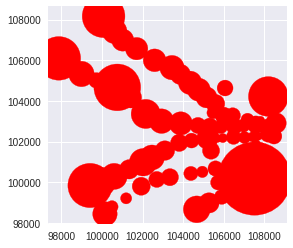

In [13]:
estaciones.plot(color='red', markersize =  estaciones.TOTAL/ 10)

In [14]:
#hacemos una funcion para que haga todo

def verSubte(hora,dia):
    dt = leerData(dia, hora)
    estaciones = gpd.read_file('data/estaciones_de_subte.shp')
    estaciones.ID = estaciones.ID.map(int)
    estaciones = estaciones.merge(dt,on='ID',how='left')
    estaciones.plot(marker='.', color='red', markersize = estaciones['TOTAL']/10
                   )

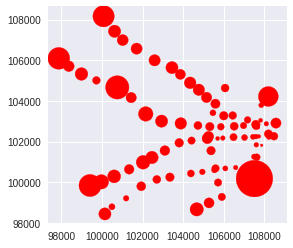

In [15]:
verSubte(hora = 8,dia = 'miercoles')

In [16]:
def verSubteLindo(hora,dia,linea):
    dt = leerData(dia, hora)
    estaciones = gpd.read_file('data/estaciones_de_subte.shp')
    estaciones.ID = estaciones.ID.map(int)
    estaciones = estaciones.merge(dt,on='ID',how='left')
    comunas = gpd.read_file('data/comunas.shp')
    
    fig = plt.figure(figsize=(18,6))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    
    colores = {
        'A':'lightblue',
        'B':'red',
        'C':'blue',
        'D':'green',
        'E':'purple',
        'H':'gold'
    }
    subdata = estaciones.loc[estaciones.LINEA==linea,:].sort_values(by='ID')
    
    comunas.plot(ax=ax1,alpha=0.5,color='grey')
    
    estaciones.plot(ax = ax1, marker='.', color='black', markersize = estaciones['TOTAL']/10,alpha=0.4)
    subdata.plot(ax = ax1, marker='.', color=colores[linea], markersize = subdata['TOTAL']/10,alpha=0.8)
     
    ax1.set_axis_off()
    
    sns.barplot(x="ESTACION", y="TOTAL", data=subdata,ax=ax2,color=colores[linea])
    
    for tick in ax2.get_xticklabels():
        tick.set_rotation(70)
    ax1.axis('equal')


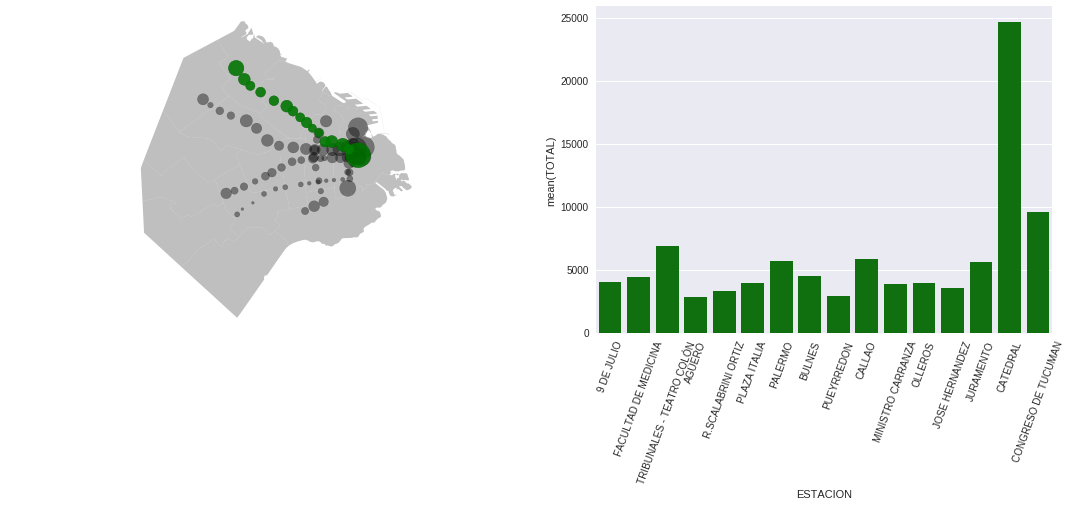

In [18]:
verSubteLindo(hora = 18,dia = 'miercoles',linea = 'D')